<a href="https://colab.research.google.com/github/sridevibonthu/APPLab/blob/main/Sprag_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#from pandas_profiling import ProfileReport

In [ ]:
pyanswers = pd.read_csv("PyResponses.csv")
mlanswers = pd.read_csv("MLResponses.csv")
questions = pd.read_csv("Question_data.csv")

In [ ]:
pyanswers.sample(2)

,QuestionID,StudentAnswer,Score1,Score2
1000,PythonQ049,Parameters local to function and help to recei...,2,2
1441,PythonQ008,"It means to start from the end, stepping backw...",4,3


In [ ]:
mlanswers.sample(2)

,QuestionID,StudentAnswer,Score1,Score2
734,BasicML017,observation that lies an abnormal distance fro...,3,3
818,BasicML014,"random trees,random forests, logestic regressi...",2,2


In [ ]:
questions.sample(2)

,QuestionID,QuestionText,QuestionType,Reference Answer
70,BasicML003,How to calculate the mean of a feature?,Apply,Mean is the sum of all the elements divided by...
63,PythonQ064,What is meant by Explicit Type Conversion and ...,Explain,The conversion of an object from one data type...


In [ ]:
len(pyanswers), len(mlanswers), len(questions)

(2929, 1110, 114)

Text(0.5, 1.0, 'Distribution of Questions')

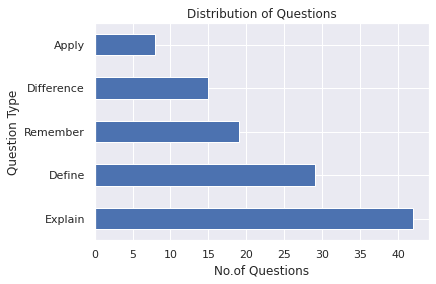

In [ ]:
#No.of questions pers question type
ax = questions['QuestionType'].value_counts().plot(kind='barh')
ax.set_xlabel('No.of Questions')
ax.set_ylabel('Question Type')
ax.set_title('Distribution of Questions')


In [ ]:
answers = pd.concat([pyanswers, mlanswers])

In [ ]:
answers.shape

(4039, 4)

Total records = 4039

In [ ]:
answers.columns

Index(['QuestionID', 'StudentAnswer', 'Score1', 'Score2'], dtype='object')

In [ ]:
R1 = answers[['Score1']]

In [ ]:
R2 = answers[['Score2']]

In [ ]:
R1.rename(columns = {'Score1':'Score'}, inplace=True)
R2.rename(columns = {'Score2':'Score'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
R1['Annot'] = "Rater-1"
R2['Annot'] = "Rater-2"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Ratings = pd.concat([R1, R2], axis=0)
Ratings.shape

(8078, 2)

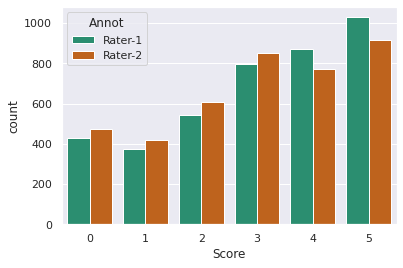

In [ ]:
sns.set_theme(style="darkgrid")

sns.countplot(x="Score", hue='Annot', data=Ratings, palette='Dark2')


#sns.countplot(x="Score2", data=answers)

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

confusion_matrix(answers.Score1, answers.Score2)

array([[423,   4,   0,   0,   0,   0],
       [ 50, 314,  10,   0,   0,   0],
       [  0,  98, 432,  12,   0,   0],
       [  0,   1, 165, 611,  21,   0],
       [  0,   0,   1, 230, 626,  12],
       [  0,   0,   0,   0, 126, 903]])

In [ ]:
cohen_kappa_score(answers.Score1, answers.Score2)

0.7788441272148627

In [ ]:
answers.columns

Index(['QuestionID', 'StudentAnswer', 'Score1', 'Score2'], dtype='object')

In [ ]:
answers.value_counts('Score1')

Score1
5    1029
4     869
3     798
2     542
0     427
1     374
dtype: int64

In [ ]:
answers.value_counts('Score2')

Score2
5    915
3    853
4    773
2    608
0    473
1    417
dtype: int64

#IAA for score 0

```
# This is formatted as code
```



In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==0 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==0 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 423    4]
 [  50 3562]]
kappa value =  0.9324991226055798


In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==1 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==1 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 314   60]
 [ 103 3562]]
kappa value =  0.7716363855837094


In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==2 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==2 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 432  110]
 [ 176 3321]]
kappa value =  0.7101810487187195


In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==3 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==3 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 611  187]
 [ 242 2999]]
kappa value =  0.6735009094590334


In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==4 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==4 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 626  243]
 [ 147 3023]]
kappa value =  0.7021478798403498


In [ ]:
answers['ts1'] = answers.apply(lambda row : "Correct" if row.Score1==5 else "Incorrect", axis=1)
answers['ts2'] = answers.apply(lambda row : "Correct" if row.Score2==5 else "Incorrect", axis=1)

print(confusion_matrix(answers.ts1, answers.ts2))
print('kappa value = ',cohen_kappa_score(answers.ts1, answers.ts2))

[[ 903  126]
 [  12 2998]]
kappa value =  0.9066165656906828


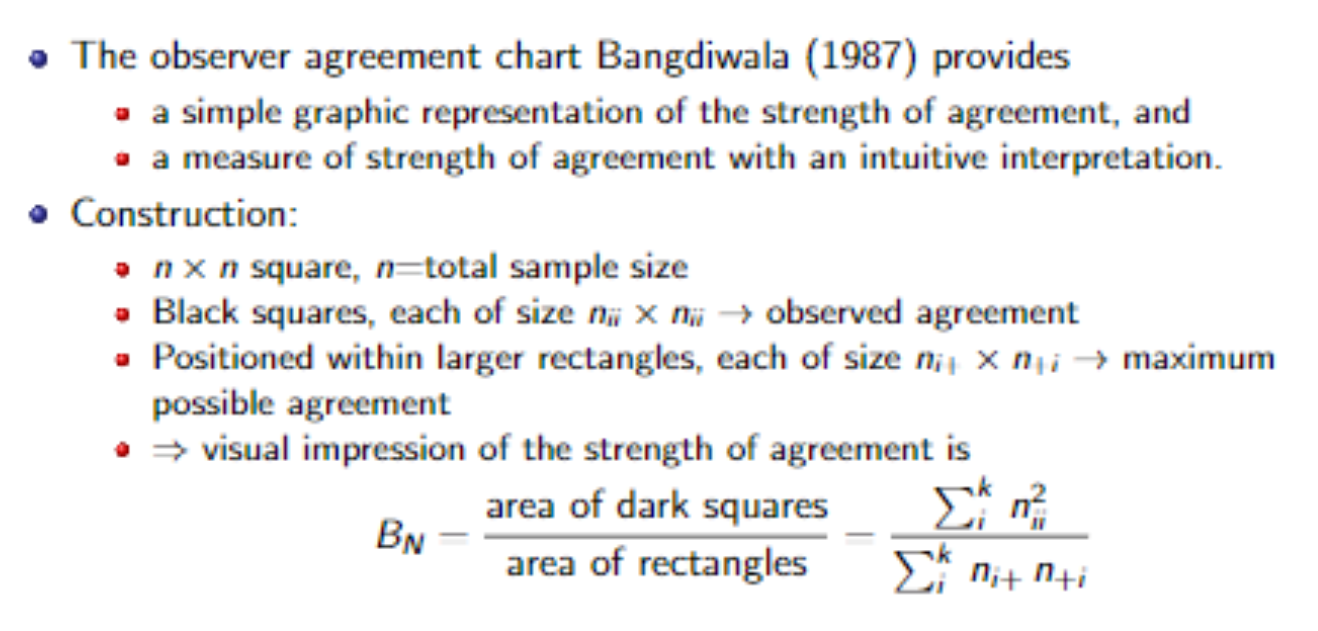

In [ ]:
answers['QuestionID'] = answers['QuestionID'].str.strip()

In [ ]:
questions['QuestionID'] = questions['QuestionID'].str.strip()

In [ ]:
#Combine reference answers and student answers

df = pd.merge(answers, questions, on='QuestionID')

In [ ]:
#answers = df

In [ ]:
#profile = ProfileReport(answers)

In [ ]:
answers.shape, df.shape

((4039, 4), (4039, 7))

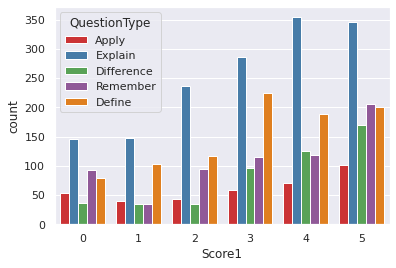

In [ ]:
sns.countplot(x='Score1', data=df, hue='QuestionType', palette='Set1' )

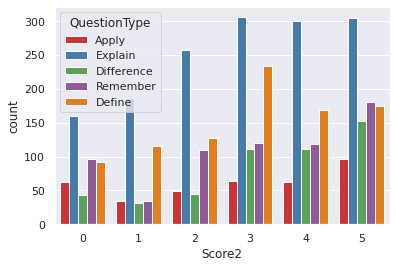

In [ ]:
sns.countplot(x='Score2', data=df, hue='QuestionType', palette='Set1' )

In [ ]:
df.sample(4)

,QuestionID,StudentAnswer,Score1,Score2,QuestionText,QuestionType,Reference Answer
279,PythonQ037,Positional arguments need to be included in th...,5,5,"Explain the statement, ""By default the argumen...",Explain,Positional arguments are arguments that need t...
2418,PythonQ030,To find minimum and maximum values in a given ...,4,4,What is the use of min() and max() functions o...,Explain,The min() function returns the item with the l...
4028,BasicML040,yes,3,3,Does Seaborn need Matplotlib?,Explain,Yes. Seaborn is also a Python library used for...
1738,PythonQ054,They are used to reduce the size of code.\nThe...,1,1,What are the benefits of default arguments in ...,Explain,Default arguments will be taken if no argument...


In [ ]:
df.head(2)

,QuestionID,StudentAnswer,Score1,Score2,QuestionText,Reference Answer
0,PythonQ001,"List, Dictionary",3.0,2.0,Write down the mutable data structures in Python?,"List, Set and Dictionary are mutable data stru..."
1,PythonQ001,Lists,2.0,1.0,Write down the mutable data structures in Python?,"List, Set and Dictionary are mutable data stru..."


In [ ]:
answers = answers.dropna()
questions = questions.dropna()

In [ ]:
questions.isna().sum()

QuestionID          0
QuestionText        0
Reference Answer    0
dtype: int64

In [ ]:
df.isna().sum()

QuestionID           0
StudentAnswer       37
Score1              66
Score2              66
QuestionText         0
Reference Answer    66
dtype: int64

In [ ]:
len(answers['QuestionID'].unique()), len(questions['QuestionID'].unique())

(114, 114)

In [ ]:
answers = df

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4131
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QuestionID        4132 non-null   object 
 1   StudentAnswer     4095 non-null   object 
 2   Score1            4066 non-null   float64
 3   Score2            4066 non-null   float64
 4   QuestionText      4132 non-null   object 
 5   Reference Answer  4066 non-null   object 
dtypes: float64(2), object(4)
memory usage: 226.0+ KB


In [ ]:
#Average of Score1 and Score 2
answers['FScore'] = answers[['Score1', 'Score2']].mean(axis=1)
answers['FScore'] = answers['FScore'].apply(np.ceil)
#answers['FScore'] = answers['FScore'].astype(int)

In [ ]:
#Additional column for binary classification 
#if the average score is more than or equal to 3, the answer is treated as correct answer
answers['Correct'] = answers['FScore'].apply(lambda fs: 1 if fs>=3 else 0)

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4131
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QuestionID        4132 non-null   object 
 1   StudentAnswer     4095 non-null   object 
 2   Score1            4066 non-null   float64
 3   Score2            4066 non-null   float64
 4   QuestionText      4132 non-null   object 
 5   Reference Answer  4066 non-null   object 
 6   FScore            4066 non-null   float64
 7   Correct           4132 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 290.5+ KB


In [ ]:
#the columns for which the student answer is not given or empty
answers[pd.isnull(answers['StudentAnswer'])]

,QuestionID,StudentAnswer,Score1,Score2,QuestionText,Reference Answer,FScore,Correct
82,PythonQ002,NaN,0.0,0.0,Define a function?,A function is a reusable block of code that i...,0.0,0
148,PythonQ005,NaN,0.0,0.0,Write a python function to find the sum of ele...,By using sum() function,0.0,0
154,PythonQ005,NaN,0.0,0.0,Write a python function to find the sum of ele...,By using sum() function,0.0,0
169,PythonQ005,NaN,0.0,0.0,Write a python function to find the sum of ele...,By using sum() function,0.0,0
174,PythonQ005,NaN,0.0,0.0,Write a python function to find the sum of ele...,By using sum() function,0.0,0
179,PythonQ005,NaN,0.0,0.0,Write a python function to find the sum of ele...,By using sum() function,0.0,0
215,PythonQ004,NaN,0.0,0.0,What is the difference between local variable ...,Local and global variable differ scope. The sc...,0.0,0
220,PythonQ004,NaN,0.0,0.0,What is the difference between local variable ...,Local and global variable differ scope. The sc...,0.0,0
266,PythonQ006,NaN,0.0,0.0,Define a compiler?,"A compiler is a system program, which translat...",0.0,0
490,PythonQ012,NaN,0.0,0.0,What is meant by a module in python?,"Modules are the files with "".py"" extension. Th...",0.0,0


In [ ]:
len(answers['StudentAnswer'][40])

24

In [ ]:
#finding length of each student answer, reference answer
answers['SAlen'] = answers['StudentAnswer'].apply(lambda s:len(str(s)))

answers['RAlen'] = answers['Reference Answer'].apply(lambda s:len(str(s)))

In [ ]:
answers.sample(2)

,QuestionID,StudentAnswer,Score1,Score2,QuestionText,Reference Answer,FScore,Correct,SAlen,RAlen
3137,BasicML014,Natural language that depends on machine learning,0.0,0.0,name few classification algorithms?,The most popular classification algorithms are...,0.0,0,49,142
2599,PythonQ057,Feature that allows function to recieve any nu...,3.0,3.0,Write about Variable length arguments?,Variable-length arguments take an unspecified ...,3.0,1,63,176


In [ ]:
print(answers.Correct.unique())
print(answers.Correct.value_counts(normalize=True))

[1 0]
1    0.655131
0    0.344869
Name: Correct, dtype: float64


In [ ]:
print(answers.FScore.unique())
print(answers.FScore.value_counts(normalize=True))

[ 3.  2.  4.  5.  0.  1. nan]
5.0    0.256026
4.0    0.215691
3.0    0.194048
2.0    0.133055
0.0    0.110674
1.0    0.090507
Name: FScore, dtype: float64


In [ ]:
answers.describe()

,Score1,Score2,FScore,Correct,SAlen,RAlen
count,4066.000000,4066.000000,4066.000000,4132.000000,4132.000000,4132.000000
mean,3.067634,2.916626,3.081653,0.655131,86.175944,155.559293
std,1.651746,1.658460,1.650740,0.475383,76.746391,87.373170
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2.000000,2.000000,2.000000,0.000000,37.750000,89.000000
50%,3.000000,3.000000,3.000000,1.000000,68.000000,144.000000
75%,5.000000,4.000000,5.000000,1.000000,112.000000,211.000000
max,5.000000,5.000000,5.000000,1.000000,1647.000000,406.000000


The score varies from 0 to 5

0 - completely incorrect

5 - correct

The mean values of the two annotators are 3.06 and 2.9.

The average answer length is 86 characters.


In [ ]:
answers['Score1'].value_counts(normalize=True)

5.0    0.253074
4.0    0.213724
3.0    0.196262
2.0    0.133301
0.0    0.111658
1.0    0.091982
Name: Score1, dtype: float64

In [ ]:
answers['Score2'].value_counts(normalize=True)

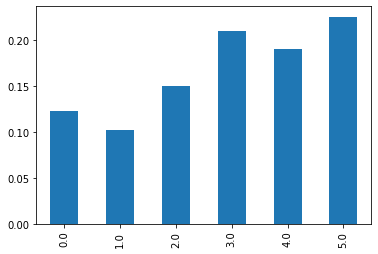

In [ ]:
answers['Score2'].value_counts(normalize=True).sort_index().plot(kind='bar')

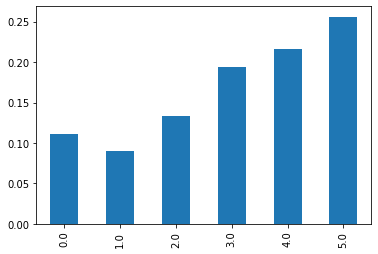

In [ ]:
answers['FScore'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
answers['Correct'].value_counts(normalize=True)

1    0.655131
0    0.344869
Name: Correct, dtype: float64

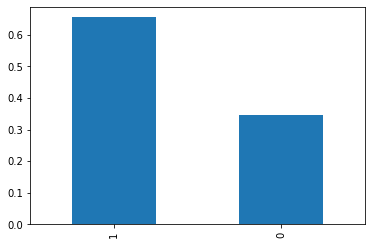

In [ ]:
#Plotting both correct and incorrect answers... 
# The dataset is not imbalanced
answers['Correct'].value_counts(normalize=True).plot(kind='bar')

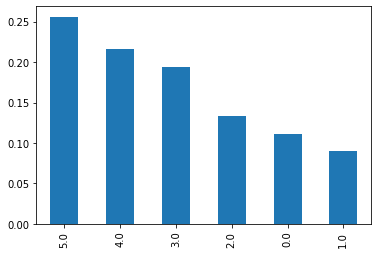

In [ ]:
answers['FScore'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
answers['FScore'].value_counts().sort_index()

0.0     450
1.0     368
2.0     541
3.0     789
4.0     877
5.0    1041
Name: FScore, dtype: int64

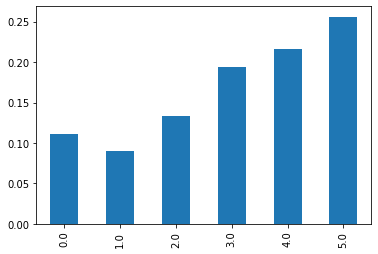

In [ ]:
answers['FScore'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
answers.columns

Index(['QuestionID', 'StudentAnswer', 'Score1', 'Score2', 'QuestionText',
       'Reference Answer', 'FScore', 'Correct', 'SAlen', 'RAlen'],
      dtype='object')

In [ ]:
#Word cloud on Student Answers
stdanswers=""
for i in answers.StudentAnswer:
  i = str(i)
  separate = i.split()
  for j in range(len(separate)):
    separate[j] = separate[j].lower()
  stdanswers += " ".join(separate)+" "

In [ ]:
questions.columns

Index(['QuestionID', 'QuestionText', 'Reference Answer'], dtype='object')

In [ ]:
#Word cloud on Reference Answers
refanswers=""
for i in questions['Reference Answer']:
  i = str(i)
  separate = i.split()
  for j in range(len(separate)):
    separate[j] = separate[j].lower()
  refanswers += " ".join(separate)+" "

In [ ]:
len(refanswers), len(stdanswers)

(18995, 354954)

In [ ]:
# Creating the Word Cloud
std_anscloud = WordCloud(width = 600, height = 400, 
                background_color ='white', 
                #stopwords = stop_words, 
                min_font_size = 10).generate(stdanswers)

ref_anscloud = WordCloud(width = 600, height = 400, 
                background_color ='white', 
                #stopwords = stop_words, 
                min_font_size = 10).generate(refanswers)

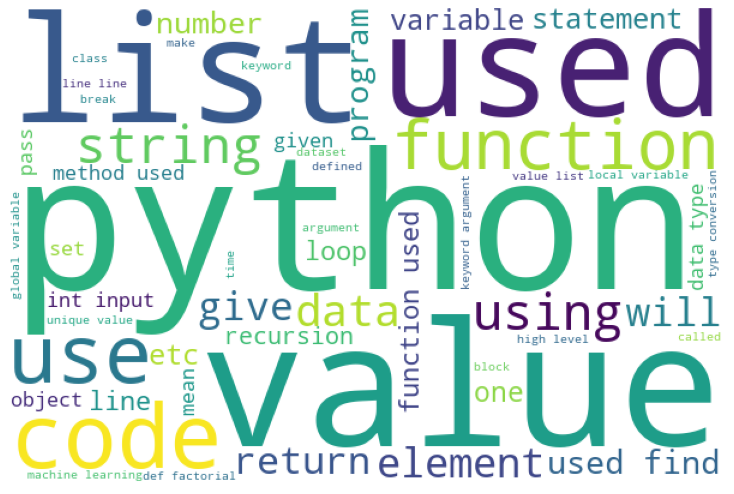

In [ ]:
# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(std_anscloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

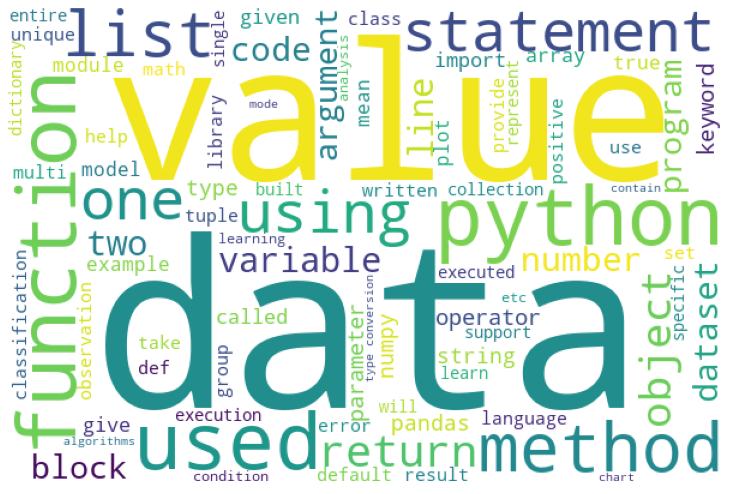

In [ ]:
# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(ref_anscloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
# Find out the number of tokens in both std answer and ref answers


In [ ]:
print(answers.duplicated(('StudentAnswer', 'Reference Answer')).sum())


201


### Data Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from bs4 import BeautifulSoup

import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess_text(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub('\W', ' ', x)
    
    lemmatizer = WordNetLemmatizer()
    x = lemmatizer.lemmatize(x)
    bfs = BeautifulSoup(x)
    x = bfs.get_text()
    x = x.strip()
    return x

In [ ]:
def data_cleaning(data):
    newdata = pd.DataFrame()
    newdata['SA'] = data['StudentAnswer'].apply(preprocess_text)
    newdata['RA'] = data['Reference Answer'].apply(preprocess_text)
    return newdata

In [ ]:
traindata = data_cleaning(answers)


In [ ]:
traindata.sample(5)


,SA,RA
2020,the readline method reads one line from the fi...,read method returns the entire content of a ...
3464,it is about how exactly the model works,accuracy is an evalution metric for classficat...
935,it is used for exponentiation,operator is used as exponentiation operator in...
2983,sum of all the data in the features divided t...,mean is the sum of all the elements divided by...
1503,we can use built in method len it returns the...,by using len built in function


In [ ]:
traindata.describe()

,SA,RA
count,4132,4132
unique,3737,115
top,nan,the min function returns the item with the l...
freq,37,124


In [ ]:
def feature_extract(data):
  data['SA_char_num'] = data.SA.apply(len)
  data['RA_char_num'] = data.RA.apply(len)
  data['RA_word_num'] = data.RA.apply(lambda x:len(x.split()))
  data['SA_word_num'] = data.SA.apply(lambda x:len(x.split()))

  data['total_word_num'] = data['RA_word_num'] + data['SA_word_num']
  data['differ_word_num'] = abs(data['RA_word_num'] - data['SA_word_num'])

  data['total_unique_word_num'] = data.apply(lambda x: len(set(x.RA.split()).union(set(x.SA.split()))) ,axis=1)
  data['total_unique_word_withoutstopword_num'] = data.apply(lambda x: len(set(x.RA.split()).union(set(x.SA.split())) - set(stopwords.words('english'))) ,axis=1)
  data['total_unique_word_num_ratio'] = data['total_unique_word_num'] / data['total_word_num']

  data['common_word_num'] = data.apply(lambda x: len(set(x.RA.split()).intersection(set(x.SA.split()))) ,axis=1)
  data['common_word_ratio'] = data['common_word_num'] / data['total_unique_word_num']
  data['common_word_ratio_min'] = data['common_word_num'] / data.apply(lambda x: min(len(set(x.RA.split())), len(set(x.SA.split()))) ,axis=1) 
  data['common_word_ratio_max'] = data['common_word_num'] / data.apply(lambda x: max(len(set(x.RA.split())), len(set(x.SA.split()))) ,axis=1) 
    
    

  return data

In [ ]:
traindata = feature_extract(traindata)

In [ ]:
traindata.sample()

,SA,RA,SA_char_num,RA_char_num,RA_word_num,SA_word_num,total_word_num,differ_word_num,total_unique_word_num,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max
2343,we use try and except keyword,try except else and finally are the keywords...,29,82,14,6,20,8,17,11,0.85,3,0.176471,0.5,0.214286


In [ ]:
traindata.describe()

,SA_char_num,RA_char_num,RA_word_num,SA_word_num,total_word_num,differ_word_num,total_unique_word_num,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max
count,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4127.000000,4132.000000
mean,85.439255,154.589061,25.579864,14.575508,40.155373,15.102130,25.550581,16.425702,0.677746,5.429574,0.229490,0.509359,0.271707
std,76.671949,87.393605,14.028610,12.932327,21.752833,12.161574,12.051716,8.047520,0.156524,5.322349,0.217112,0.290266,0.225714
min,0.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.272727,0.000000,0.000000,0.000000,0.000000
25%,37.000000,89.000000,15.000000,6.000000,24.000000,6.000000,17.000000,11.000000,0.576471,2.000000,0.096774,0.304348,0.125000
50%,67.000000,143.000000,23.000000,11.000000,37.000000,13.000000,24.000000,15.000000,0.687500,4.000000,0.172414,0.500000,0.217391
75%,111.000000,215.000000,36.000000,19.000000,53.000000,22.000000,33.000000,21.000000,0.785714,7.000000,0.277778,0.714286,0.347826
max,1640.000000,405.000000,65.000000,237.000000,255.000000,219.000000,107.000000,77.000000,1.000000,42.000000,1.000000,1.000000,1.000000


###EDA with features

In [ ]:
import seaborn as sns

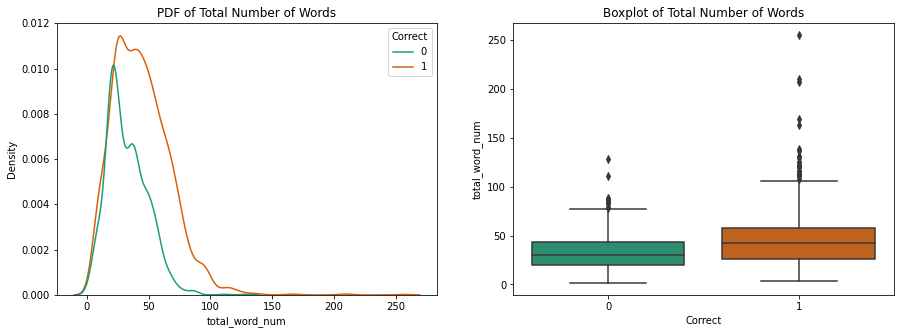

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Number of Words')
sns.kdeplot(traindata['total_word_num'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Number of Words')
sns.boxplot(x=answers.Correct, y=traindata['total_word_num'], palette="Dark2", ax=ax[1])
plt.show()

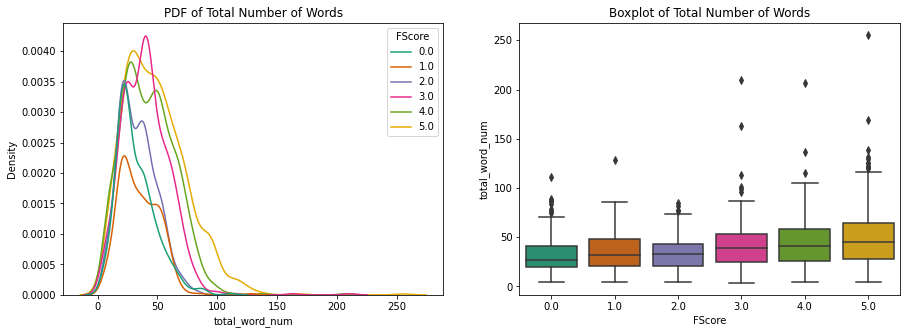

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Number of Words')
sns.kdeplot(traindata['total_word_num'], hue=answers.FScore, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Number of Words')
sns.boxplot(x=answers.FScore, y=traindata['total_word_num'], palette="Dark2", ax=ax[1])
plt.show()

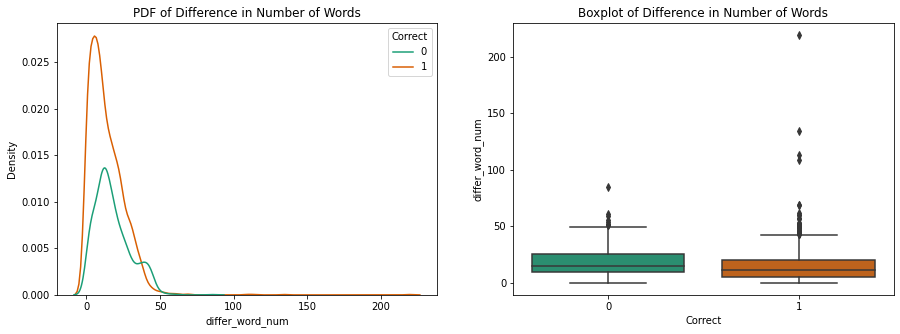

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Difference in Number of Words')
sns.kdeplot(traindata['differ_word_num'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Difference in Number of Words')
sns.boxplot(x=answers.Correct, y=traindata['differ_word_num'], palette="Dark2", ax=ax[1])
plt.show()

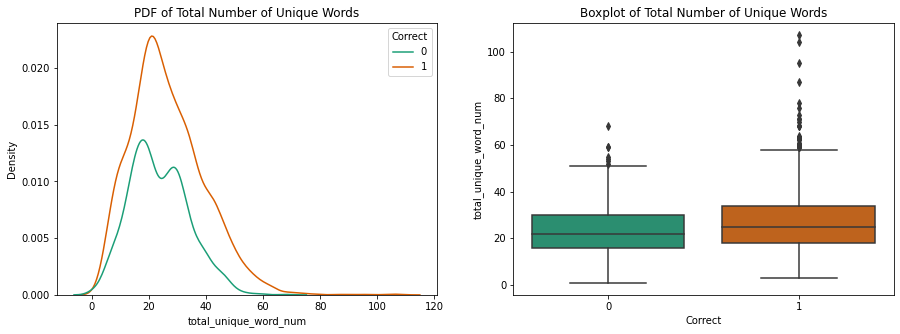

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Number of Unique Words')
sns.kdeplot(traindata['total_unique_word_num'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Number of Unique Words')
sns.boxplot(x=answers.Correct, y=traindata['total_unique_word_num'], palette="Dark2", ax=ax[1])
plt.show()

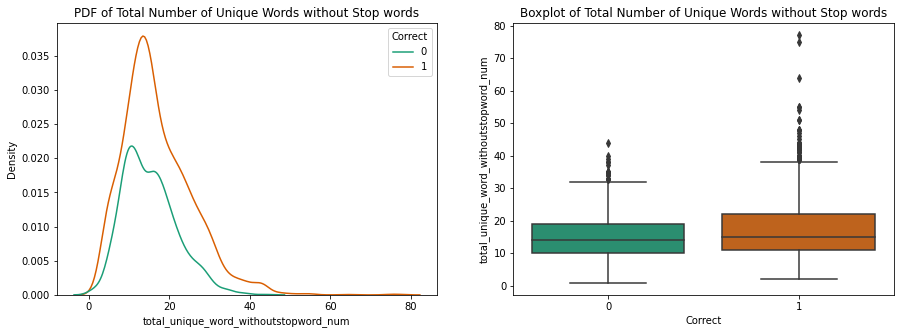

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Number of Unique Words without Stop words')
sns.kdeplot(traindata['total_unique_word_withoutstopword_num'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Number of Unique Words without Stop words')
sns.boxplot(x=answers.Correct, y=traindata['total_unique_word_withoutstopword_num'], palette="Dark2", ax=ax[1])
plt.show()

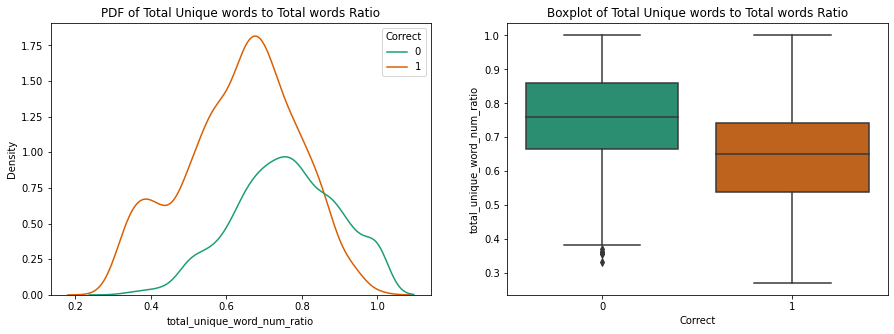

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Unique words to Total words Ratio')
sns.kdeplot(traindata['total_unique_word_num_ratio'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Unique words to Total words Ratio')
sns.boxplot(x=answers.Correct, y=traindata['total_unique_word_num_ratio'], palette="Dark2", ax=ax[1])
plt.show()

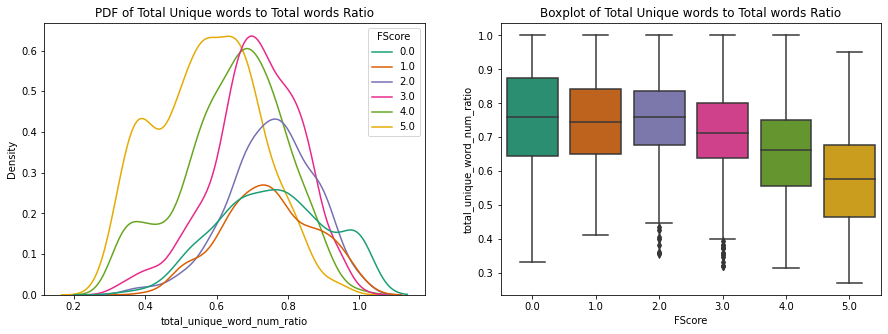

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Total Unique words to Total words Ratio')
sns.kdeplot(traindata['total_unique_word_num_ratio'], hue=answers.FScore, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Total Unique words to Total words Ratio')
sns.boxplot(x=answers.FScore, y=traindata['total_unique_word_num_ratio'], palette="Dark2", ax=ax[1])
plt.show()

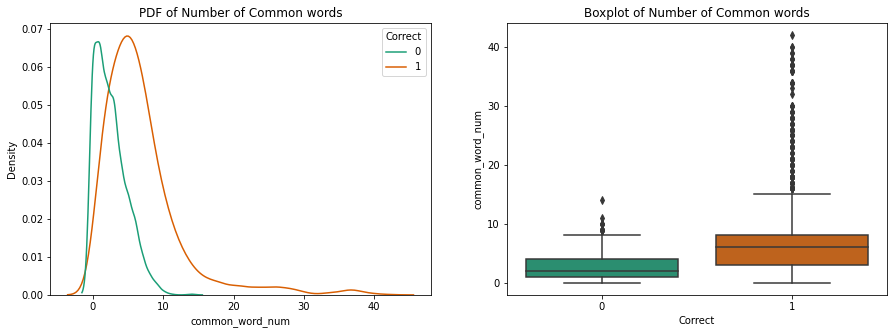

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].title.set_text('PDF of Number of Common words')
sns.kdeplot(traindata['common_word_num'], hue=answers.Correct, palette="Dark2", ax=ax[0])
ax[1].title.set_text('Boxplot of Number of Common words')
sns.boxplot(x=answers.Correct, y=traindata['common_word_num'], palette="Dark2", ax=ax[1])
plt.show()

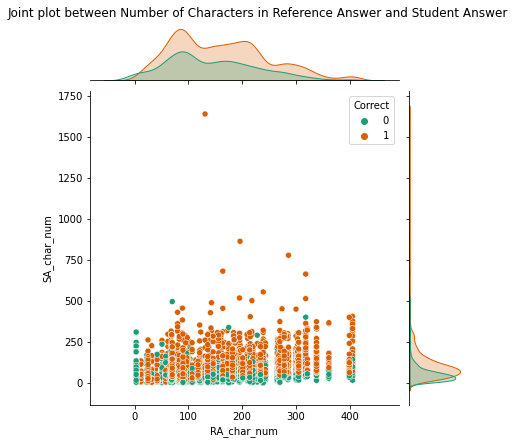

In [ ]:
g = sns.jointplot(x = 'RA_char_num', y = 'SA_char_num', kind = "scatter", hue=answers.Correct, data = traindata, palette="Dark2")
g.fig.suptitle("Joint plot between Number of Characters in Reference Answer and Student Answer", y=1.02)
plt.show()

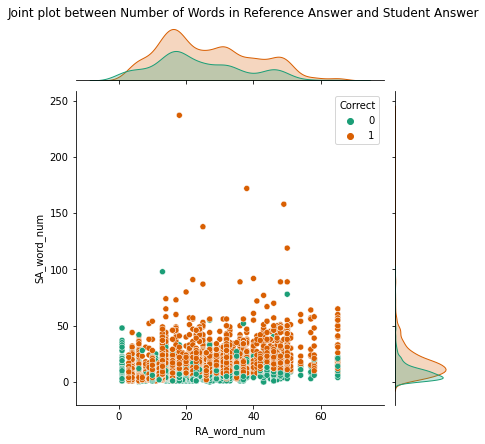

In [ ]:
g = sns.jointplot(x = 'RA_word_num', y = 'SA_word_num', kind = "scatter", hue=answers.Correct, data = traindata, palette="Dark2")
g.fig.suptitle("Joint plot between Number of Words in Reference Answer and Student Answer", y=1.02)
plt.show()

### Featurization with Sentence BERT

In [ ]:
!pip install -qU transformers sentence-transformers

     |████████████████████████████████| 3.5 MB 4.5 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 6.8 MB 38.9 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 895 kB 55.8 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
modelST = SentenceTransformer('paraphrase-mpnet-base-v2')


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# It took a lot of time, caused gpu overheat.
# So I decided to do it in batch and save them in file.
def getBertEmbeddings(data, filename):
    batch = 20000
    with open(filename, 'wb') as f:
        while(len(data)):
            tempdata = data[:batch]
            data = data[batch:]
            tempembed = modelST.encode(tempdata.values, device='cuda')
            np.save(f, tempembed, allow_pickle=True)
#             time.sleep(60) # for gpu heating issue

In [ ]:
# Get SentenceBERT embedding of train data
getBertEmbeddings(traindata.RA, 'temp_train_RA_sentenceBERT.npy')
getBertEmbeddings(traindata.SA, 'temp_train_SA_sentenceBERT.npy')

RuntimeError: ignored